In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


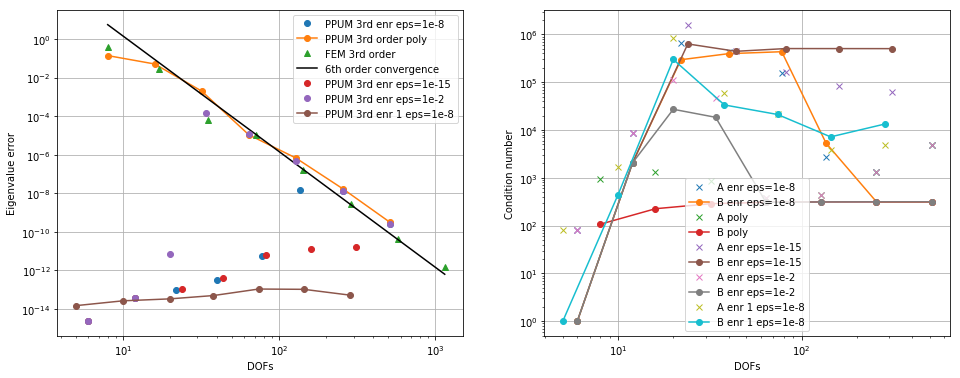

In [2]:
D = loadtxt("../ppum_conv_enr.txt")
Nb = D[:, 0]
condA = D[:, 1]
condB = D[:, 2]
eigs = D[:, 3:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
figure(figsize=(16,6))
subplot(121)
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "o", label="PPUM 3rd enr eps=1e-8")

grid()
subplot(122)
loglog(Nb, condA, "x", label="A enr eps=1e-8")
loglog(Nb, condB, "o-", label="B enr eps=1e-8")

D = loadtxt("../ppum_conv_np.txt")
Nb = D[:, 0]
condA = D[:, 1]
condB = D[:, 2]
loglog(Nb, condA, "x", label="A poly")
loglog(Nb, condB, "o-", label="B poly")
grid()
xlabel("DOFs")
ylabel("Condition number")
subplot(121)
eigs = D[:, 3:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "o-", label="PPUM 3rd order poly")
xlabel("DOFs")
ylabel("Eigenvalue error")

D = loadtxt("../../fem/fem3.txt")
Nb = D[:, 0]
subplot(121)
eigs = D[:, 1:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "^", label="FEM 3rd order")
    
y = 1/Nb**6
i = 0 # eig
j = -2 # x-point
y = y / y[j] * abs(eigs[j,i] - eigs_ref[i])
loglog(Nb, y, "k-", label="6th order convergence")

D = loadtxt("../ppum_conv_enr3.txt")
Nb = D[:, 0]
condA = D[:, 1]
condB = D[:, 2]
eigs = D[:, 3:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
subplot(122)
loglog(Nb, condA, "x", label="A enr eps=1e-15")
loglog(Nb, condB, "o-", label="B enr eps=1e-15")
subplot(121)
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "o", label="PPUM 3rd enr eps=1e-15")
    
D = loadtxt("../ppum_conv_enr2.txt")
Nb = D[:, 0]
condA = D[:, 1]
condB = D[:, 2]
eigs = D[:, 3:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
subplot(122)
loglog(Nb, condA, "x", label="A enr eps=1e-2")
loglog(Nb, condB, "o-", label="B enr eps=1e-2")
legend()
subplot(121)
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "o", label="PPUM 3rd enr eps=1e-2")

D = loadtxt("../ppum_conv.txt")
Nb = D[:, 0]
condA = D[:, 1]
condB = D[:, 2]
eigs = D[:, 3:]
eigs_ref = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
subplot(122)
loglog(Nb, condA, "x", label="A enr 1 eps=1e-8")
loglog(Nb, condB, "o-", label="B enr 1 eps=1e-8")
legend()
subplot(121)
for i in range(1):
    loglog(Nb, abs(eigs[:,i] - eigs_ref[i]), "o-", label="PPUM 3rd enr 1 eps=1e-8")
    
    
legend()
#savefig("ppum_fem_conv.pdf")
show()

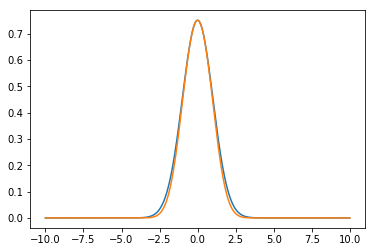

In [3]:
def h(r, rc):
    a = 1 + 20*(r/rc)**7-70*(r/rc)**6+84*(r/rc)**5-35*(r/rc)**4
    a[r > rc] = 0
    return a
x = linspace(-10, 10, 1000)
plot(x, exp(-x**2/2) / pi**(1./4))
rc = 5.
plot(x, exp(-x**2/2) / pi**(1./4)*h(abs(x), rc))
show()

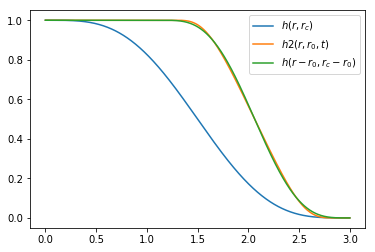

In [4]:
rc = 3
t = 0.6

x = linspace(0, rc, 1000)
def u(rt):
    a = empty(size(rt), dtype="double")
    a[rt > 0] = exp(-1/rt[rt > 0])
    a[rt <= 0] = 0
    return a

def ht(rt):
    return u(rt) / (u(rt)+u(1-rt))

def rt(r, r0, t):
    return 1-t*(r-r0)/r0

def h2(r, r0, t):
    return ht(rt(r, r0, t))
    
r0 = rc*t/(t+1)
plot(x, h(x,rc), label="$h(r, r_c)$")
plot(x, h2(x,r0,t), label="$h2(r, r_0, t)$")
y = h(x-r0,rc-r0)
y[x<=r0] = 1
plot(x, y, label="$h(r-r_0,r_c-r_0)$")
legend()
show()